## Unit 4 - Quantum Mechanics in 3D

<a href="https://colab.research.google.com/github/uqglmn/qm/blob/main/QM_Problem_458.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 4.58

An electron is in the spin state
$$
\chi = A \begin{pmatrix} 1-2i \\ 2\end{pmatrix}
$$

Assume that $A\in\mathbb{R}$.

**(a)** Determine the constant $A$ by normalising $\chi$.

**(b)** If you measured $S_z$ on this electron, what values could you get, and what is the
probability of each? What is the expectation value of $S_z$?

**(c)** If you measured $S_x$ on this electron, what values could you get, and what is the
probability of each? What is the expectation value of $S_x$?

**(d)** If you measured $S_y$ on this electron, what values could you get, and what is the
probability of each? What is the expectation value of $S_y$?

### Solution

#### Solution to (a)

Normalisation condition is 
$$
1 = \chi^\dagger \chi = A^2 \begin{pmatrix} 1+ 2i & 2 \end{pmatrix}  \begin{pmatrix} 1- 2i \\ 2 \end{pmatrix} = A^2 (1+4+4) = 9 A^2
$$
Thus $A = \pm1/3$.

Let's repeat with SymPy:

In [1]:
import sympy as sym
from sympy.physics.quantum.dagger import Dagger
sym.init_printing(use_unicode=True)

In [2]:
A   = sym.symbols("A", real=True)      # normalisation constant
chi = A*sym.Matrix([[1-2*sym.I],[2]])  # spin state

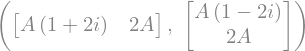

In [3]:
(Dagger(chi), chi)  # let's check how the Dagger works

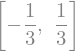

In [4]:
sym.solve(Dagger(chi).dot(chi)-1, A)   # solve the equation Dagger(chi).chi = 1) for A: 

#### Solution to (b)

Without loss of generality, we choose $A=1/3$.

The spin operator $S_z = \dfrac\hbar2\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $ has eigenvectors
$\chi_-^{(z)} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ and $\chi_+^{(z)} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$
with eigenvalues $-\hbar/2$ and $+\hbar/2$, respectively. 

Measuring $S_z$ on the state $\chi$ may yield $-\hbar/2$ with probability

$$
P_1 = |c_1|^2 = \big|(\chi_-^{(z)})^\dagger \chi\big|^2 = \Bigg|\begin{pmatrix} 0 & 1 \end{pmatrix} \cdot \frac13\begin{pmatrix} 1-2i \\ 2\end{pmatrix} \Bigg|^2 = \bigg| \frac{2}{3}\bigg|^2 = \frac{4}{9}
$$

and $+\hbar/2$ with probability

$$
P_2 = |c_2|^2 = \big|(\chi_+^{(z)})^\dagger \chi\big|^2 = \Bigg|\begin{pmatrix} 1 & 0 \end{pmatrix} \cdot \frac13\begin{pmatrix} 1-2i \\ 2\end{pmatrix} \Bigg|^2 = \bigg| \frac{1-2i}{3}\bigg|^2 = \frac{5}{9}
$$

(Sanity check: $P_1 + P_2 = 4/9 + 5/9 = 1$)

The expectation value of $S_z$ on $\chi$ is
$$
\langle S_z \rangle = \chi^\dagger S_z \chi = \frac13 \begin{pmatrix} 1+ 2i & 2 \end{pmatrix} \cdot \frac\hbar2\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \cdot \frac13 \begin{pmatrix} 1- 2i \\ 2 \end{pmatrix} = \frac{\hbar}{18}
$$

Equivalently
$$
\langle S_z \rangle = |c_1|^2 \cdot (-\hbar/2) + |c_2|^2 \cdot (\hbar/2) = \frac{\hbar}{18}
$$

Let's repeat with SymPy:

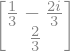

In [5]:
chi = sym.Rational(1,3)*sym.Matrix([[1-2*sym.I],[2]])  # spin state with A = 1/3
chi

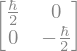

In [6]:
hbar = sym.symbols("hbar", real=True)   # Planck constant 
Sz = hbar/2*sym.Matrix([[1,0],[0,-1]])  # spin operator S_z
Sz

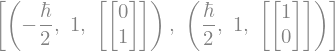

In [7]:
Sz.eigenvects()  # eigenvalues, their multiplicities and eigenvectors

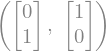

In [8]:
chi_z_minus = Sz.eigenvects()[0][2][0]  # select the first eigenvector
chi_z_plus  = Sz.eigenvects()[1][2][0]  # select the second eigenvector

(chi_z_minus, chi_z_plus)  # check eigenvectors - notice that they are normalised to 1

In [9]:
print("The probability to measure -ℏ/2 is:")
c1 = Dagger(chi_z_minus).dot(chi)
sym.Abs(c1)**2

The probability to measure -ℏ/2 is:


In [10]:
print("The probability to measure +ℏ/2 is:")
c2 = Dagger(chi_z_plus).dot(chi)
sym.Abs(c2)**2

The probability to measure +ℏ/2 is:


In [11]:
print("The expectation value of S_z is:")
Dagger(chi).dot(Sz @ chi).simplify()

The expectation value of S_z is:


#### Solution to (c)

The computations are essentially the same, thus we do everything with SymPy only:

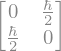

In [12]:
Sx = hbar/2*sym.Matrix([[0,1],[1,0]])  # spin operator S_x
Sx

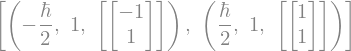

In [13]:
Sx.eigenvects()  # eigenvalues, their multiplicities and eigenvectors

In [14]:
B = 1/sym.sqrt(2)                           # normalisation constant for eigenvectors
chi_x_minus = B * Sx.eigenvects()[0][2][0]  # select the first eigenvector
chi_x_plus  = B * Sx.eigenvects()[1][2][0]  # select the second eigenvector

In [15]:
print("The probability to measure -ℏ/2 is:")
c1 = Dagger(chi_x_minus).dot(chi)
sym.Abs(c1)**2

The probability to measure -ℏ/2 is:


In [16]:
print("The probability to measure +ℏ/2 is:")
c2 = Dagger(chi_x_plus).dot(chi)
sym.Abs(c2)**2

The probability to measure +ℏ/2 is:


In [17]:
print("The expectation value of S_x is:")
Dagger(chi).dot(Sx @ chi).simplify()

The expectation value of S_x is:


#### Solution to (d)

Repeat the same once again:

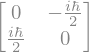

In [18]:
Sy = hbar/2*sym.Matrix([[0,-sym.I],[sym.I,0]])  # spin operator S_y
Sy

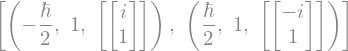

In [19]:
Sy.eigenvects()  # eigenvalues, their multiplicities and eigenvectors

In [20]:
B = 1/sym.sqrt(2)                           # normalisation constant for eigenvectors
chi_y_minus = B * Sy.eigenvects()[0][2][0]  # select the first eigenvector
chi_y_plus  = B * Sy.eigenvects()[1][2][0]  # select the second eigenvector

In [21]:
print("The probability to measure -ℏ/2 is:")
c1 = Dagger(chi_y_minus).dot(chi)
sym.Abs(c1)**2

The probability to measure -ℏ/2 is:


In [22]:
print("The probability to measure +ℏ/2 is:")
c2 = Dagger(chi_y_plus).dot(chi)
sym.Abs(c2)**2

The probability to measure +ℏ/2 is:


In [23]:
print("The expectation value of S_y is:")
Dagger(chi).dot(Sy @ chi).simplify()

The expectation value of S_y is:


---